# ISM6163 Data Mining - Final Project

## Completed By
Pooja Giri<br>Nitika Sant<br>Kunal Singh<br>Shubham Mishra<br>

# Book Recommendation System

**Overview**<br>
Recommendation systems exploit user preferences and traits to prioritize and recommend items which the users would like.

Recommendations systems are a big value-add for large companies like Google, Amazon, Facebook, Netflix etc. as they drive significant customer engagement and revenue. Analysts estimate that already 35% of what consumers purchase on Amazon and 75%of what they watch on Netflix come from product recommendations based on recommendation algorithms. 

Recommendation systems not only exploit users by tempting them to buy more products & services customized to their tastes, but also keep them engaged for a longer time to show them more ads and get more clients.



**DataMining Techniques Used**

1) Collaborative Filtering<br>
    - User Based Collaborative Filtering
    - Item-Based Collaborative Filtering
    
2) K-nearest neighbor Classification Algorithm



In [297]:
#Making necesarry imports
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

In [298]:
#Setting the current working directory
os.chdir('E:/DataMining/project')

In [299]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [300]:
#Loading data
books = pd.read_csv('books.csv', sep=',', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']
books.head()

users = pd.read_csv('Users.csv', sep=',', error_bad_lines=False, encoding="latin-1")
users.columns = ['UserID', 'Area', 'Location', 'Country', 'Age']
users.head()

ratings = pd.read_csv('Ratings.csv', sep=',', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [301]:
#checking shapes of the datasets
print(books.shape)
print(users.shape)
print(ratings.shape)

(271379, 5)
(276271, 5)
(49999, 3)


In [302]:
#checking data types of columns
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    int64 
publisher            object
dtype: object

In [303]:
#making this setting to display full text in columns
pd.set_option('display.max_colwidth', -1)

In [304]:
#However, the value 0 is invalid and as this dataset was published in 2004, I have assumed the the years after 2006 to be 
#invalid keeping some margin in case dataset was updated thereafer
#setting invalid years as NaN
#books.head()

books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

In [305]:
#replacing NaNs with mean value of yearOfPublication
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

In [306]:
#rechecking
books.yearOfPublication.isnull().sum()
#No NaNs

0

**publisher**

In [307]:
#if publisher does not exist , replace NaN with Other
books.loc[books.publisher.isnull(),:]='Other'


**Users**

In [308]:
print(users.shape)
users.head()

(276271, 5)


,UserID,Area,Location,Country,Age
0,1.0,nyc,new york,usa,NaN
1,2.0,stockton,california,usa,18.0
2,3.0,moscow,yukon territory,russia,NaN
3,4.0,porto,v.n.gaia,portugal,17.0
4,5.0,farnborough,hants,united kingdom,NaN


In [309]:
users.dtypes

UserID      float64
Area        object 
Location    object 
Country     object 
Age         float64
dtype: object

**userID**

In [310]:
users.UserID.values

#it can be seen that these are unique

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 2.78856e+05,
       2.78857e+05, 2.78858e+05])

**Age**

In [311]:
print(sorted(users.Age.unique()))
#Age column has some invalid entries like nan, 0 and very high values like 100 and above

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228.0

In [312]:
#In my view values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by NaNs
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [313]:
#replacing NaNs with mean
users.Age = users.Age.fillna(users.Age.mean())

In [314]:
#setting the data type as int
users.Age = users.Age.astype(np.int32)

In [315]:
#rechecking
print(sorted(users.Age.unique()))
#looks good now

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


**Ratings Dataset**

In [316]:
#checking shape
ratings.shape

(49999, 3)

In [317]:
#ratings dataset will have n_users*n_books entries if every user rated every item, this shows that the dataset is very sparse
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

74974147709


In [318]:
#checking first few rows...
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [319]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [320]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [321]:
print(ratings.shape)
print(ratings_new.shape)
#it can be seen that many rows having book ISBN not part of books dataset got dropped off

(49999, 3)
(38684, 3)


In [322]:
#ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset
ratings = ratings[ratings.userID.isin(users.UserID)]

In [323]:
print(ratings.shape)
print(ratings_new.shape)
#no new users added, hence we will go with above dataset ratings_new (1031136, 3)

(49697, 3)
(38684, 3)


In [324]:
print("number of users: " + str(n_users))
print("number of books: " + str(n_books))

number of users: 276271
number of books: 271379


In [325]:
#Sparsity of dataset in %
sparsity=1.0-len(ratings_new)/float(n_users*n_books)
print('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99994840354817 %


In [326]:
#As quoted in the description of the dataset -
#BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 
#higher values denoting higher appreciation, or implicit, expressed by 0
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  4,  9,  1,  2], dtype=int64)

In [327]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [328]:
#checking shapes
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(38684, 3)
(16157, 3)
(22527, 3)


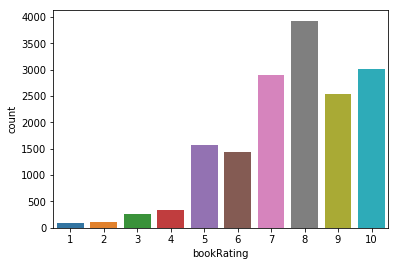

In [329]:
#plotting count of bookRating
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

**Simple Popularity Based Recommendation System**

In [330]:
#At this point , a simple popularity based recommendation system can be built based on count of user ratings for different books
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending = False).head(10)
print("Following books are recommended")
top10.merge(books, left_index = True, right_on = 'ISBN')

#Given below are top 10 recommendations based on popularity. It is evident that books authored by J.K. Rowling are most popular

Following books are recommended


,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
180907,260,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
168294,225,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,Little
180882,185,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
119174,175,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
108421,146,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
130697,142,059035342X,Harry Potter and the Sorcerers Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
180893,138,156027321,Life of Pi,Yann Martel,2003,Harvest Books
42296,136,446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
119183,134,446672211,Where the Heart Is (Oprahs Book Club (Paperback)),Billie Letts,1998,Warner Books
88622,128,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA


In [331]:
#Similarly segregating users who have given explicit ratings from 1-10 and those whose implicit behavior was tracked
users_exp_ratings = users[users.UserID.isin(ratings_explicit.userID)]
users_imp_ratings = users[users.UserID.isin(ratings_implicit.userID)]

In [332]:
#checking shapes
print(users.shape)
print(users_exp_ratings.shape)
print(users_imp_ratings.shape)

(276271, 5)
(3093, 5)
(2223, 5)


**Collaborative Filtering Based Recommendation Systems**

In [333]:
#To cope up with computing power I have and to reduce the dataset size, I am considering users who have rated atleast 100 books
#and books which have atleast 100 ratings
counts1 = ratings_explicit['userID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['bookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts >= 100].index)]

In [334]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(15, 3963)


ISBN,000225929X,000648302X,000649840X,002411510X,002542730X,003008685X,006000438X,006000553X,006017546X,006017773X,...,971290903,974757004,99110601,99244926,99279347,99282194,99317605,99521016,99740516,99993805
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6242,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print(n_users, n_books)

15 3963


In [336]:
#since NaNs cannot be handled by training algorithms, replacing these by 0, which indicates absence of ratings
#setting data type
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [337]:
#checking first few rows
ratings_matrix.head(5)

ISBN,000225929X,000648302X,000649840X,002411510X,002542730X,003008685X,006000438X,006000553X,006017546X,006017773X,...,971290903,974757004,99110601,99244926,99279347,99282194,99317605,99521016,99740516,99993805
userID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6242,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
#rechecking the sparsity
sparsity=1.0-len(ratings_explicit)/float(users_exp_ratings.shape[0]*n_books)
print('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.9650990870205 %


**Training our recommendation system**

In [339]:
ratings_explicit

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1465,277427,60542128,7
1474,277427,61009059,9
1477,277427,62507109,8
1483,277427,132220598,8
1488,277427,140283374,6
1490,277427,014039026X,8
1491,277427,140390715,7
1494,277427,141439742,8


In [340]:
#setting global variables
global metric,k
k=10
metric='cosine'

**User-based Recommendation System**

In [341]:
#This function finds k similar users given the user_id and ratings matrix 
#These similarities are same as obtained via using pairwise_distances
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
            
    return similarities,indices

In [342]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [343]:
predict_userbased(11676,'003008685X',ratings_matrix);


Predicted rating for user 11676 -> item 003008685X: 4


**Item-based Recommendation Systems**

In [344]:
#This function finds k similar items given the item_id and ratings matrix

def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

In [345]:
similarities,indices=findksimilaritems('003008685X',ratings_matrix)
similarities
indices

array([[2104, 3828, 2217, 3030, 3851,  737,  654, 3842, 3856, 3047, 3503]],
      dtype=int64)

In [346]:
#This function predicts the rating for specified user-item combination based on item-based approach
def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = int(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))     
    
    return prediction

In [347]:
prediction = predict_itembased(11676,'003008685X',ratings_matrix)


Predicted rating for user 11676 -> item 003008685X: 1


In [348]:
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [349]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem(user_id, ratings, metric=metric):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    else:    
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            #clear_output(wait=True)
            prediction = []            
            if change['type'] == 'change' and change['name'] == 'value':            
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:                       
                    metric = 'cosine'   
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print("As per {0} approach....Following books are recommended...".format(select.value))
                for i in range(len(recommended)):
                     print("{0}. {1}".format(i+1,books.bookTitle[recommended.index[i]]))                        
        select.observe(on_change)
        display(select)
        return prediction

In [350]:
#checking for incorrect entries
recommendItem(999999,ratings_matrix)

User id should be a valid integer from this list :

   2033   2276   4017   5582   6242   6251   6543   6575   7346   8067
   8245   8681   8890  11676 277427 


In [351]:
recommendItem(6251, ratings_matrix)

Dropdown(description='Select approach', options=('Item-based (correlation)', 'Item-based (cosine)', 'User-based (correlation)', 'User-based (cosine)'), value='Item-based (correlation)')

1

In [352]:
recommendItem(6242, ratings_matrix)

Dropdown(description='Select approach', options=('Item-based (correlation)', 'Item-based (cosine)', 'User-based (correlation)', 'User-based (cosine)'), value='Item-based (correlation)')

1

In [353]:
from scipy.sparse.linalg import svds

#R = ratings_matrix.as_matrix()
#user_ratings_mean = np.mean(R, axis = 1)
#R_demeaned = R - user_ratings_mean.reshape(-1, 1)
#R_demeaned.take(2)

ratings_matrix = ratings_matrix.astype(np.float32)
ratings_matrix.dtypes

ISBN
000225929X    float32
000648302X    float32
000649840X    float32
002411510X    float32
002542730X    float32
003008685X    float32
006000438X    float32
006000553X    float32
006017546X    float32
006017773X    float32
006019197X    float32
006019250X    float32
006019295X    float32
006019491X    float32
006039384X    float32
006055780X    float32
006091646X    float32
006092988X    float32
006093090X    float32
006093316X    float32
006093395X    float32
006096300X    float32
006097270X    float32
006097754X    float32
006098824X    float32
006101253X    float32
006101351X    float32
006101432X    float32
006103200X    float32
006104234X    float32
               ...   
920668372     float32
920897533     float32
930878450     float32
931580366     float32
931580781     float32
932379435     float32
932592007     float32
933377444     float32
937858668     float32
938756605     float32
961551445     float32
962307203     float32
964335905     float32
964420805     float32
96503

In [356]:
#SVD
U, sigma, Vt = svds(ratings_matrix.as_matrix(), k = 5)

In [359]:
def rmse(prediction, ground_truth):
    #prediction = prediction[ground_truth.nonzero()].flatten()
    #ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [399]:
#Coverting it into diagonal matrix
sigma = np.diag(sigma)


#Making Predictions
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
#all_user_predicted_ratings.take(4)
#rmse(all_user_predicted_ratings, ratings_matrix)
print('User-based CF MSE: ' + str(rmse(all_user_predicted_ratings, ratings_matrix)))

User-based CF MSE: 1.2007471341589953
